In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load Bookings data
data = pd.read_csv('Bookings_Data.csv')

# Data cleaning
data['Booking Date Date'] = pd.to_datetime(data['Booking Date Date'])
data['Created Date'] = pd.to_datetime(data['Created Date'])

In [89]:
# Create column to see if opp is "Closed Won"
data['IsClosedWon'] = data['Stage Name'].apply(lambda x: 1 if x == 'Closed Won' else 0)
# Calculate the total opportunities and closed-won opportunities:
close_rate_df = data.groupby('Global Region').agg(
    total_opportunities=('ID', 'count'),
    closed_won_opportunities=('IsClosedWon', 'sum')
).reset_index()
# Calc Close Rate
close_rate_df['Close Rate'] = close_rate_df['closed_won_opportunities'] / close_rate_df['total_opportunities']


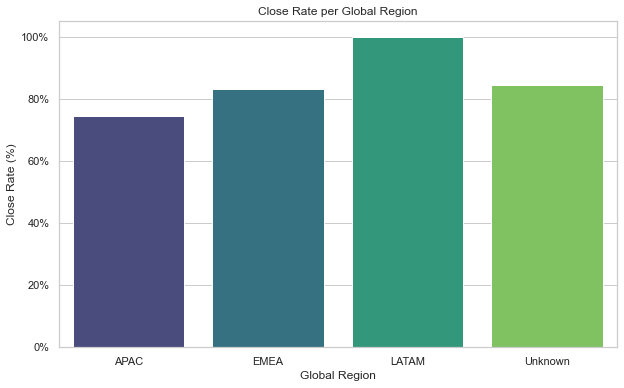

In [90]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Global Region', y='Close Rate', data=close_rate_df, palette='viridis')

# Add titles and labels
plt.title('Close Rate per Global Region')
plt.xlabel('Global Region')
plt.ylabel('Close Rate (%)')

# Function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Apply the percentage formatting to the y-axis
formatter = FuncFormatter(to_percent)
bar_plot.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

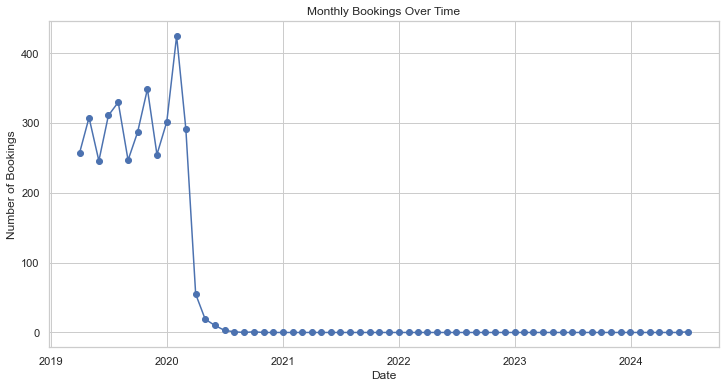

In [91]:
# Plot total bookings over time
data.set_index('Booking Date Date', inplace=True)
monthly_bookings = data.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_bookings, marker='o')
plt.title('Monthly Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

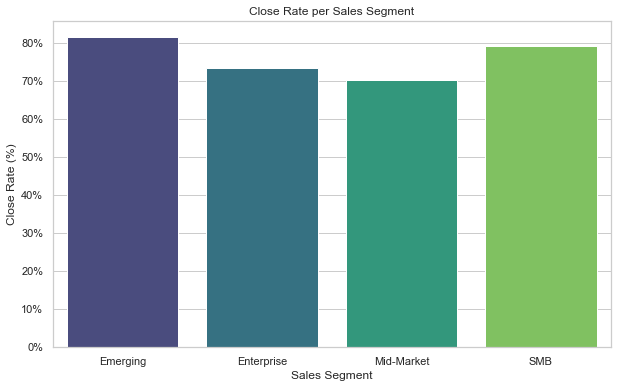

In [92]:
# Group by Sales Segment and calculate the total opportunities and closed-won opportunities
close_rate_segment_df = data.groupby('Sales Segment').agg(
    total_opportunities=('ID', 'count'),
    closed_won_opportunities=('IsClosedWon', 'sum')
).reset_index()

# Calculate the Close Rate
close_rate_segment_df['Close Rate'] = close_rate_segment_df['closed_won_opportunities'] / close_rate_segment_df['total_opportunities']

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Sales Segment', y='Close Rate', data=close_rate_segment_df, palette='viridis')

# Add titles and labels
plt.title('Close Rate per Sales Segment')
plt.xlabel('Sales Segment')
plt.ylabel('Close Rate (%)')

# Function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Apply the percentage formatting to the y-axis
formatter = FuncFormatter(to_percent)
bar_plot.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

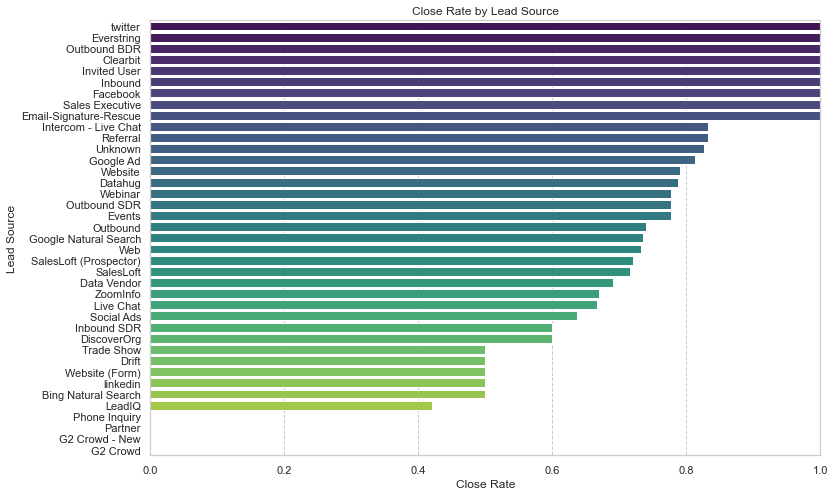

In [93]:
# Close rate by Lead Source
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.barplot(y='Lead Source', x='Closed Won', data=lead_source_close_rate, palette='viridis')
plt.title('Close Rate by Lead Source')
plt.xlabel('Close Rate')
plt.ylabel('Lead Source')
plt.xlim(0, 1)  # Ensure x-axis limits are from 0 to 1
plt.grid(True, axis='x', linestyle='--')  # Add grid lines for better readability
plt.show()

In [94]:
# Check for missing values in Lead Source, Global Region, and Source
missing_lead_source = data['Lead Source'].isnull().sum()
missing_global_region = data['Global Region'].isnull().sum()
missing_source = data['Source'].isnull().sum()

total_rows = len(data)
missing_lead_percentage = (missing_lead_source / total_rows) * 100
missing_global_region_percentage = (missing_global_region / total_rows) * 100
missing_source_percentage = (missing_source / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Missing Lead Source: {missing_lead_source} ({missing_lead_percentage:.2f}%)")
print(f"Missing Global Region: {missing_global_region} ({missing_global_region_percentage:.2f}%)")
print(f"Missing Source: {missing_source} ({missing_source_percentage:.2f}%)")

Total rows: 3699
Missing Lead Source: 2529 (68.37%)
Missing Global Region: 3175 (85.83%)
Missing Source: 2529 (68.37%)


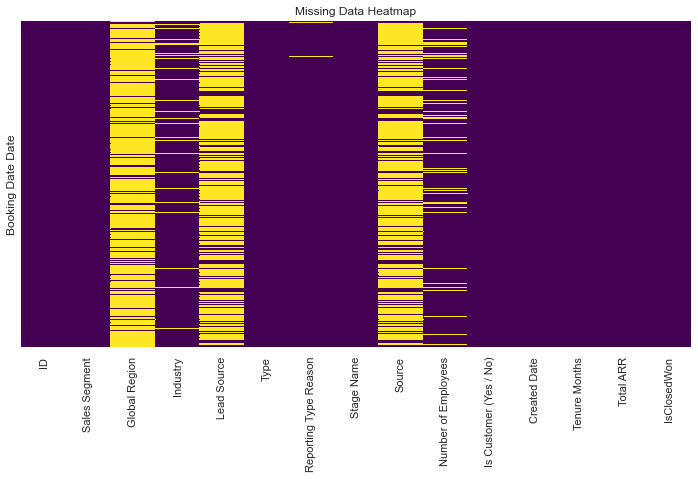

In [95]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [96]:
# Fill missing values with 'Unknown'
data['Lead Source'].fillna('Unknown', inplace=True)
data['Global Region'].fillna('Unknown', inplace=True)
data['Source'].fillna('Unknown', inplace=True)

In [97]:
# Filter out rows with missing Lead Source, Global Region, Source
data_complete = data.dropna(subset=['Lead Source'])
data_complete = data.dropna(subset=['Global Region'])
data_complete = data.dropna(subset=['Source'])

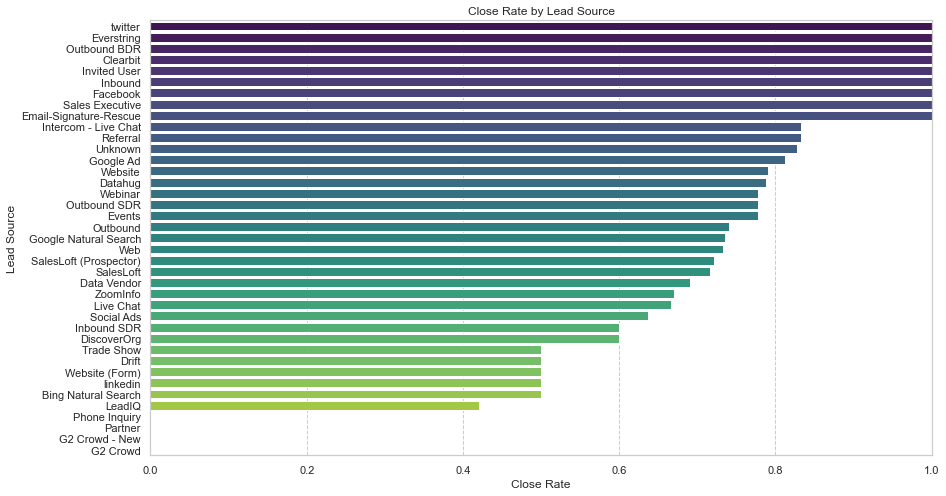

In [99]:
# Plot Close Rate by Lead Source (including 'Unknown')
lead_source_close_rate = data.groupby('Lead Source')['IsClosedWon'].mean().reset_index()
lead_source_close_rate = lead_source_close_rate.sort_values(by='IsClosedWon', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='Lead Source', x='IsClosedWon', data=lead_source_close_rate, palette='viridis')
plt.title('Close Rate by Lead Source')
plt.xlabel('Close Rate')
plt.ylabel('Lead Source')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--')
plt.show()

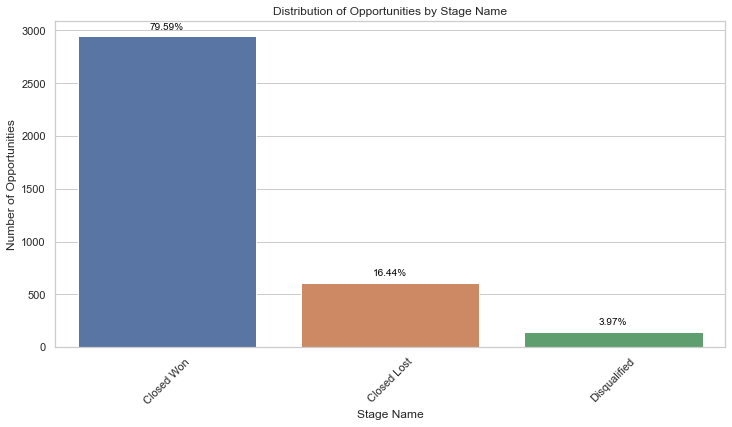

In [100]:
# Calculate the count and percentage for each stage
stage_counts = data['Stage Name'].value_counts().reset_index()
stage_counts.columns = ['Stage Name', 'Count']
stage_counts['Percentage'] = (stage_counts['Count'] / stage_counts['Count'].sum()) * 100

# Plot the distribution of opportunities by Stage Name
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Stage Name', y='Count', data=stage_counts)

# Annotate the bars with the percentage
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height / stage_counts["Count"].sum() * 100:.2f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Distribution of Opportunities by Stage Name')
plt.xlabel('Stage Name')
plt.ylabel('Number of Opportunities')
plt.xticks(rotation=45)
plt.show()

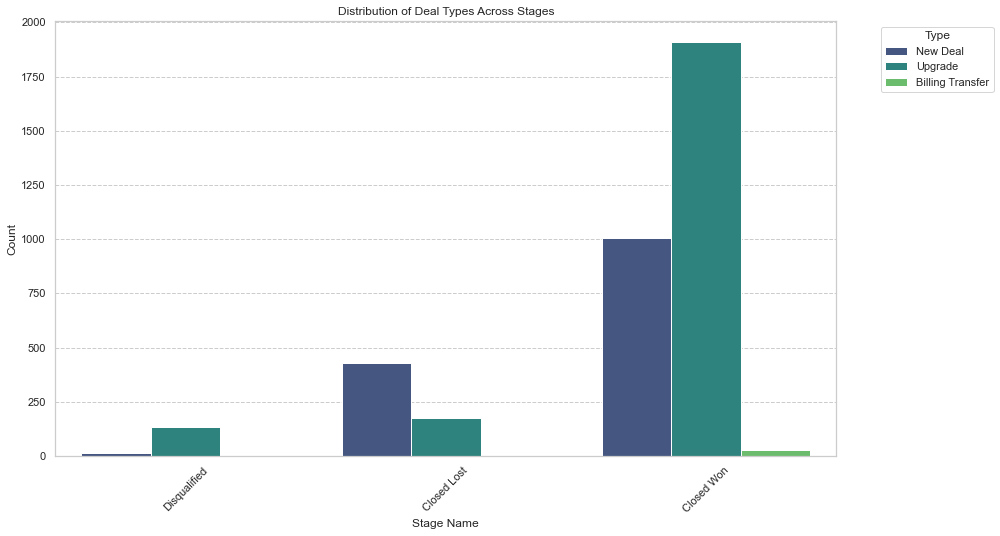

In [101]:
# Added  a column for Closed Won
data['IsClosedWon'] = data['Stage Name'].apply(lambda x: 1 if x == 'IsClosedWon' else 0)

# Plotting the distribution of Type across Stage Name
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Stage Name', hue='Type', palette='viridis')
plt.title('Distribution of Deal Types Across Stages')
plt.xlabel('Stage Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--')
plt.show()

In [102]:
# Add a column for Closed Won and Closed Lost
data['Closed Won'] = data['Stage Name'].apply(lambda x: 1 if x == 'Closed Won' else 0)
data['Closed Lost'] = data['Stage Name'].apply(lambda x: 1 if x == 'Closed Lost' else 0)

# Total number of Upgrade deals
total_upgrades = len(data[data['Type'] == 'Upgrade'])

# Total number of Upgrade deals that were Closed Won
upgrade_closed_won = len(data[(data['Type'] == 'Upgrade') & (data['Stage Name'] == 'Closed Won')])

# Total number of New Deal deals
total_new_deals = len(data[data['Type'] == 'New Deal'])

# Total number of New Deal deals that were Closed Lost
new_deal_closed_lost = len(data[(data['Type'] == 'New Deal') & (data['Stage Name'] == 'Closed Lost')])

# Percentage of Upgrade deals that were Closed Won
percent_upgrade_closed_won = (upgrade_closed_won / total_upgrades) * 100 if total_upgrades > 0 else 0

# Percentage of New Deal deals that were Closed Lost
percent_new_deal_closed_lost = (new_deal_closed_lost / total_new_deals) * 100 if total_new_deals > 0 else 0

print(f"Percentage of Upgrade deals that were Closed Won: {percent_upgrade_closed_won:.2f}%")
print(f"Percentage of New Deal deals that were Closed Lost: {percent_new_deal_closed_lost:.2f}%")

Percentage of Upgrade deals that were Closed Won: 86.00%
Percentage of New Deal deals that were Closed Lost: 29.70%


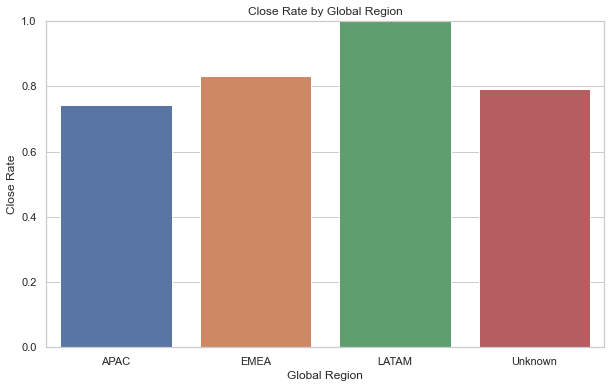

In [103]:
# Close rate by Global Region
region_close_rate = data.groupby('Global Region')['Closed Won'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Global Region', y='Closed Won', data=region_close_rate)
plt.title('Close Rate by Global Region')
plt.xlabel('Global Region')
plt.ylabel('Close Rate')
plt.ylim(0, 1)
plt.show()